# Notebook 01 : Exploration des Données - Bank Customer Churn
# =============================================================

## Analyse Exploratoire - Prédiction du Churn Bancaire

## **Objectif** : Comprendre les données et identifier les patterns de churn

## **Dataset** : ABC Multinational Bank - 10,000 clients

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [13]:
# Chargement des données

df = pd.read_csv('/Users/denismutombotshituka/bank-churn-mlops/data/raw/Bank_Churn_Prediction.csv')

print("=" * 60)
print("CHARGEMENT DES DONNÉES")
print("=" * 60)
print(f"Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"Taille mémoire : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


CHARGEMENT DES DONNÉES
Dimensions : 10000 lignes × 12 colonnes
Taille mémoire : 1.95 MB


In [4]:
# Aperçu des données

print("\n" + "=" * 60)
print("APERÇU DES DONNÉES")
print("=" * 60)
df.head(10)


APERÇU DES DONNÉES


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
# Informations générales

print("\n" + "=" * 60)
print("INFORMATIONS GÉNÉRALES")
print("=" * 60)
df.info()


INFORMATIONS GÉNÉRALES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
# Statistiques descriptives

print("\n" + "=" * 60)
print("STATISTIQUES DESCRIPTIVES")
print("=" * 60)
df.describe()


STATISTIQUES DESCRIPTIVES


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Analyse des valeurs manquantes

print("\n" + "=" * 60)
print("VALEURS MANQUANTES")
print("=" * 60)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Valeurs Manquantes': missing.values,
    'Pourcentage': missing_pct.values
})
print(missing_df[missing_df['Valeurs Manquantes'] > 0])
print(f"\n✅ Aucune valeur manquante détectée" if missing.sum() == 0 else "⚠️ Valeurs manquantes à traiter")


VALEURS MANQUANTES
Empty DataFrame
Columns: [Colonne, Valeurs Manquantes, Pourcentage]
Index: []

✅ Aucune valeur manquante détectée



ANALYSE DE LA VARIABLE CIBLE - CHURN
Distribution du Churn :
  Non-Churners (0) : 7,963 (79.63%)
  Churners (1)     : 2,037 (20.37%)

⚠️ Déséquilibre des classes : ratio 3.9:1


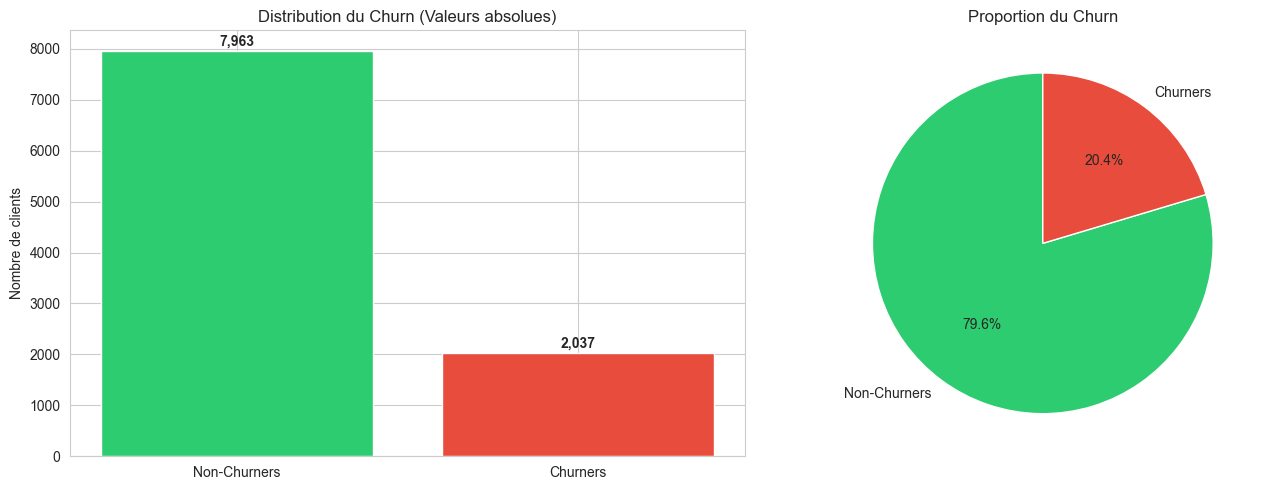

In [14]:
# Analyse de la variable cible - CHURN

print("\n" + "=" * 60)
print("ANALYSE DE LA VARIABLE CIBLE - CHURN")
print("=" * 60)

churn_counts = df['churn'].value_counts()
churn_pct = df['churn'].value_counts(normalize=True) * 100

print(f"Distribution du Churn :")
print(f"  Non-Churners (0) : {churn_counts.get(0, 0):,} ({churn_pct.get(0, 0):.2f}%)")
print(f"  Churners (1)     : {churn_counts.get(1, 0):,} ({churn_pct.get(1, 0):.2f}%)")
print(f"\n⚠️ Déséquilibre des classes : ratio {churn_pct.get(0, 0)/churn_pct.get(1, 1):.1f}:1")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique en barres
axes[0].bar(['Non-Churners', 'Churners'], churn_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Nombre de clients')
axes[0].set_title('Distribution du Churn (Valeurs absolues)')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 100, f'{v:,}', ha='center', fontweight='bold')

# Graphique en camembert
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_counts.values, labels=['Non-Churners', 'Churners'],
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Proportion du Churn')

plt.tight_layout()
plt.savefig('../docs/churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



ANALYSE DES VARIABLES NUMÉRIQUES

credit_score:
  Moyenne : 650.53
  Médiane : 652.00
  Écart-type : 96.65
  Min : 350.00 | Max : 850.00
  Distribution normale ? ❌ Non (p=0.0000)

age:
  Moyenne : 38.92
  Médiane : 37.00
  Écart-type : 10.49
  Min : 18.00 | Max : 92.00
  Distribution normale ? ❌ Non (p=0.0000)

tenure:
  Moyenne : 5.01
  Médiane : 5.00
  Écart-type : 2.89
  Min : 0.00 | Max : 10.00
  Distribution normale ? ❌ Non (p=0.0000)

balance:
  Moyenne : 76485.89
  Médiane : 97198.54
  Écart-type : 62397.41
  Min : 0.00 | Max : 250898.09
  Distribution normale ? ❌ Non (p=0.0000)

products_number:
  Moyenne : 1.53
  Médiane : 1.00
  Écart-type : 0.58
  Min : 1.00 | Max : 4.00
  Distribution normale ? ❌ Non (p=0.0000)

estimated_salary:
  Moyenne : 100090.24
  Médiane : 100193.91
  Écart-type : 57510.49
  Min : 11.58 | Max : 199992.48
  Distribution normale ? ❌ Non (p=0.0000)


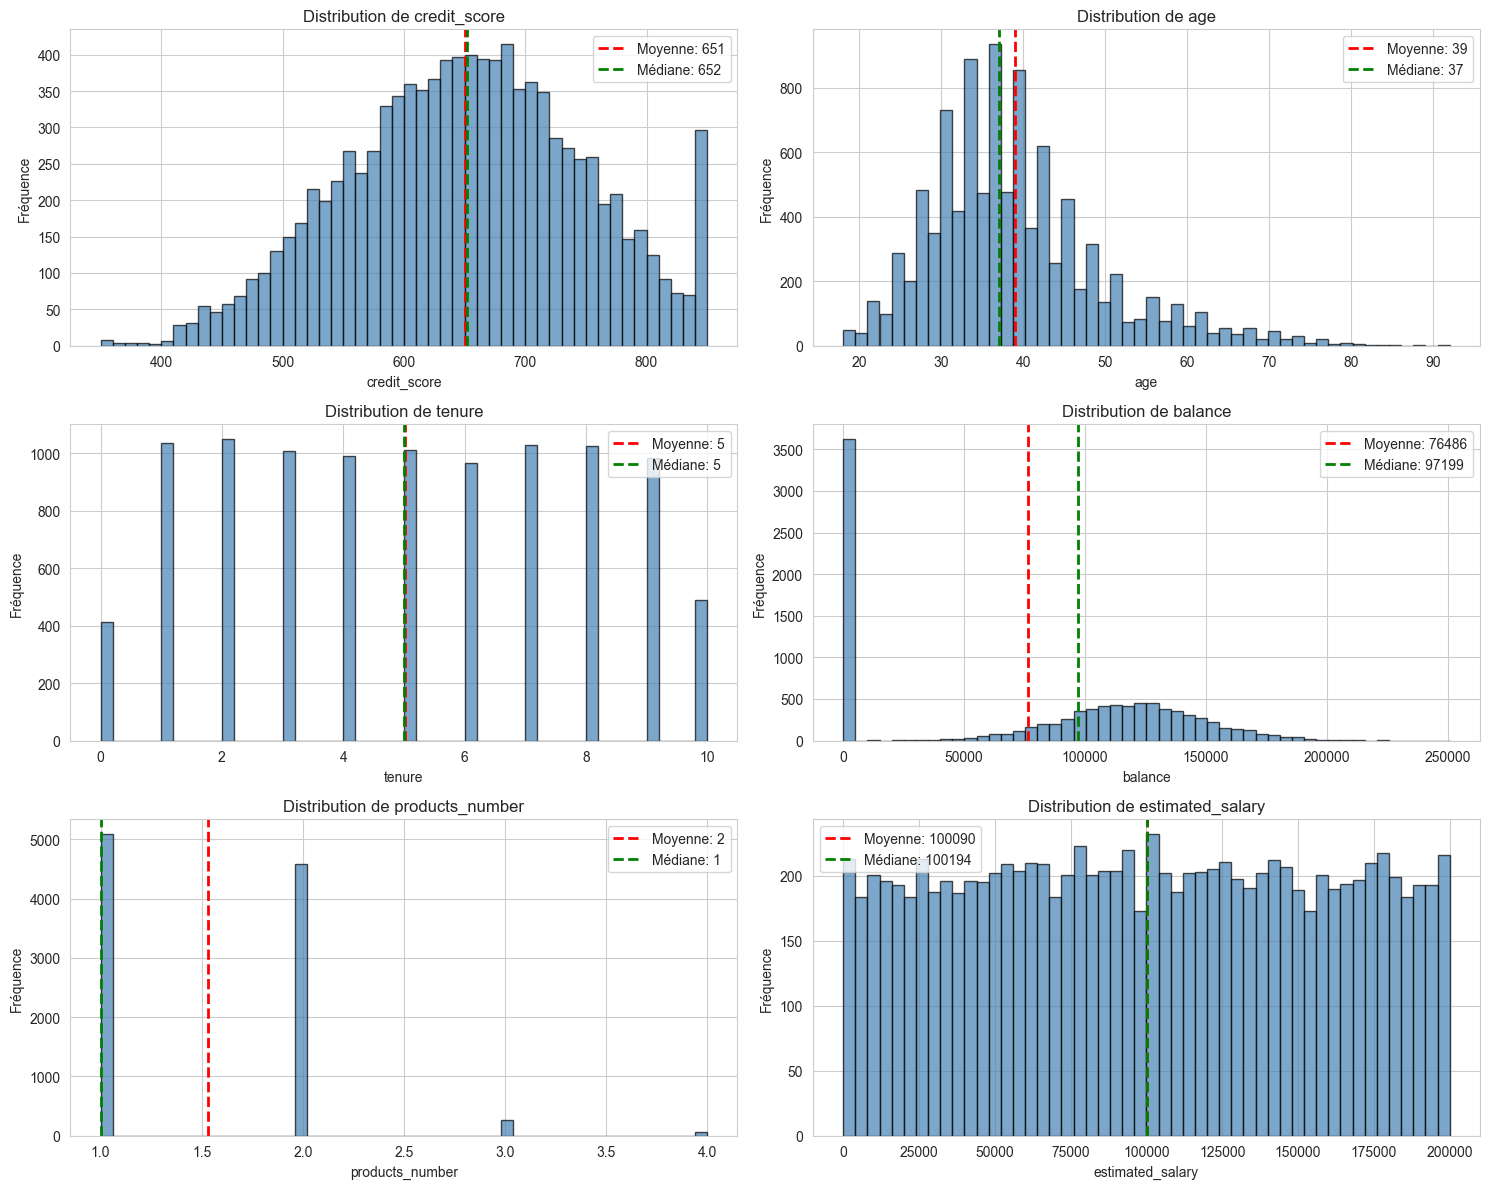

In [16]:
# Analyse des variables numériques

print("\n" + "=" * 60)
print("ANALYSE DES VARIABLES NUMÉRIQUES")
print("=" * 60)

numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 
                  'products_number', 'estimated_salary']

for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Moyenne : {df[col].mean():.2f}")
    print(f"  Médiane : {df[col].median():.2f}")
    print(f"  Écart-type : {df[col].std():.2f}")
    print(f"  Min : {df[col].min():.2f} | Max : {df[col].max():.2f}")
    
    # Test de normalité (avec gestion des exceptions si besoin !)
    try:
        stat, p_value = stats.normaltest(df[col])
        print(f"  Distribution normale ? {'✅ Oui' if p_value > 0.05 else '❌ Non'} (p={p_value:.4f})")
    except Exception as e:
        print(f"  Test impossible : {e}")


# Visualisation distributions
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {df[col].mean():.0f}')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Médiane: {df[col].median():.0f}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Fréquence')
    axes[idx].set_title(f'Distribution de {col}')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('../docs/numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()



DÉTECTION DES OUTLIERS (Méthode IQR)

credit_score:
  Q1: 584.00 | Q3: 718.00 | IQR: 134.00
  Limites: [383.00, 919.00]
  Outliers: 15 (0.15%)

age:
  Q1: 32.00 | Q3: 44.00 | IQR: 12.00
  Limites: [14.00, 62.00]
  Outliers: 359 (3.59%)

tenure:
  Q1: 3.00 | Q3: 7.00 | IQR: 4.00
  Limites: [-3.00, 13.00]
  Outliers: 0 (0.00%)

balance:
  Q1: 0.00 | Q3: 127644.24 | IQR: 127644.24
  Limites: [-191466.36, 319110.60]
  Outliers: 0 (0.00%)

products_number:
  Q1: 1.00 | Q3: 2.00 | IQR: 1.00
  Limites: [-0.50, 3.50]
  Outliers: 60 (0.60%)

estimated_salary:
  Q1: 51002.11 | Q3: 149388.25 | IQR: 98386.14
  Limites: [-96577.10, 296967.45]
  Outliers: 0 (0.00%)


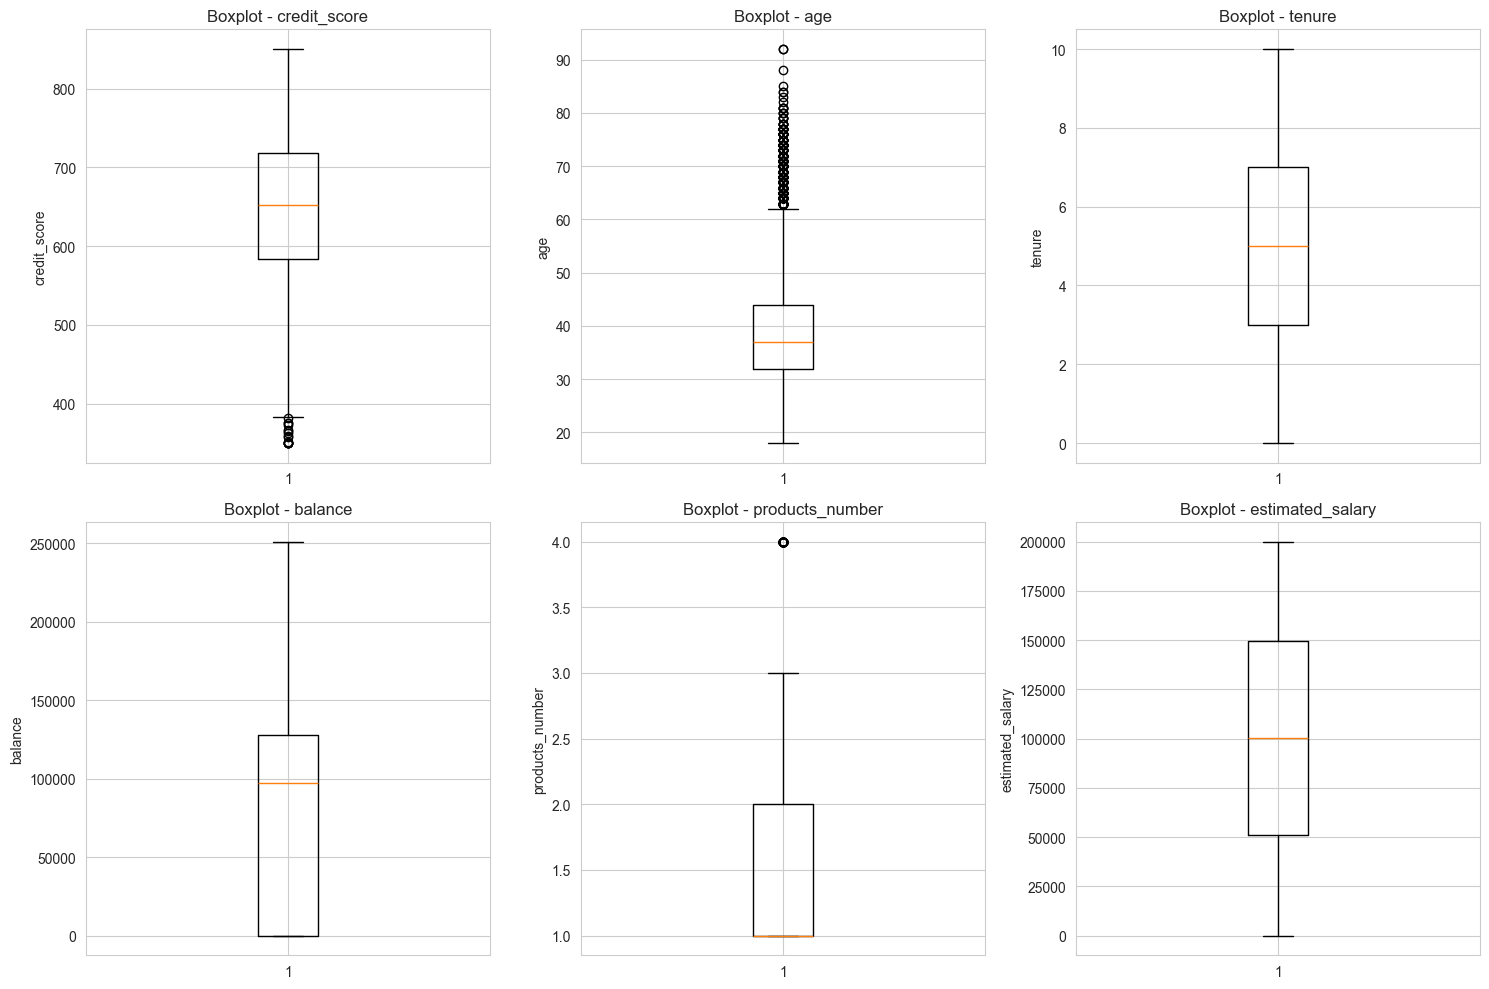

In [17]:
# Détection des outliers

print("\n" + "=" * 60)
print("DÉTECTION DES OUTLIERS (Méthode IQR)")
print("=" * 60)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100
    
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f} | Q3: {Q3:.2f} | IQR: {IQR:.2f}")
    print(f"  Limites: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers: {len(outliers)} ({outlier_pct:.2f}%)")

# Boxplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f'Boxplot - {col}')

plt.tight_layout()
plt.savefig('../docs/outliers_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()



ANALYSE DES VARIABLES CATÉGORIELLES

country:
  France: 5,014 (50.14%)
  Germany: 2,509 (25.09%)
  Spain: 2,477 (24.77%)

gender:
  Male: 5,457 (54.57%)
  Female: 4,543 (45.43%)

credit_card:
  1: 7,055 (70.55%)
  0: 2,945 (29.45%)

active_member:
  1: 5,151 (51.51%)
  0: 4,849 (48.49%)


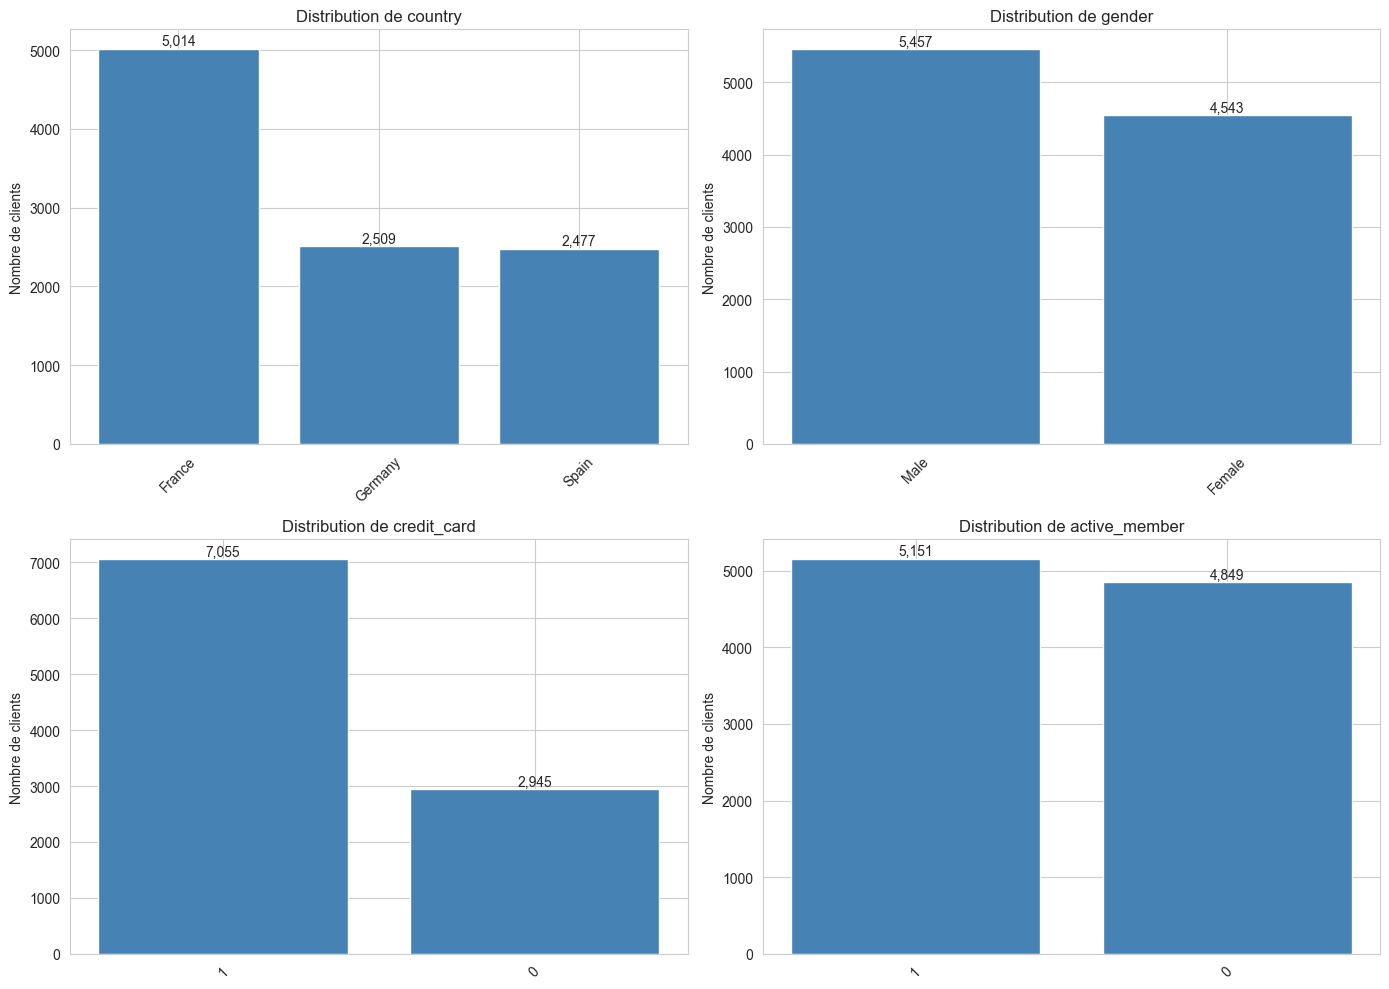

In [19]:
# Analyse des variables catégorielles

print("\n" + "=" * 60)
print("ANALYSE DES VARIABLES CATÉGORIELLES")
print("=" * 60)

# Liste des vraies colonnes catégorielles selon votre DataFrame
categorical_cols = ['country', 'gender', 'credit_card', 'active_member']

for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    value_pct = df[col].value_counts(normalize=True) * 100
    
    for val, count, pct in zip(value_counts.index, value_counts.values, value_pct.values):
        print(f"  {val}: {count:,} ({pct:.2f}%)")



# Visualisation
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, color='steelblue')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45)
    axes[idx].set_ylabel('Nombre de clients')
    axes[idx].set_title(f'Distribution de {col}')
    
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + 50, f'{v:,}', ha='center')

plt.tight_layout()
plt.savefig('../docs/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


ANALYSE BIVARIÉE - CHURN VS VARIABLES NUMÉRIQUES

credit_score:
  Moyenne Non-Churn: 651.85
  Moyenne Churn: 645.35
  Différence: 6.50
  Significativité: ** (p=0.0067)

age:
  Moyenne Non-Churn: 37.41
  Moyenne Churn: 44.84
  Différence: 7.43
  Significativité: *** (p=0.0000)

tenure:
  Moyenne Non-Churn: 5.03
  Moyenne Churn: 4.93
  Différence: 0.10
  Significativité: ns (p=0.1615)

balance:
  Moyenne Non-Churn: 72745.30
  Moyenne Churn: 91108.54
  Différence: 18363.24
  Significativité: *** (p=0.0000)

products_number:
  Moyenne Non-Churn: 1.54
  Moyenne Churn: 1.48
  Différence: 0.07
  Significativité: *** (p=0.0000)

estimated_salary:
  Moyenne Non-Churn: 99738.39
  Moyenne Churn: 101465.68
  Différence: 1727.29
  Significativité: ns (p=0.2264)


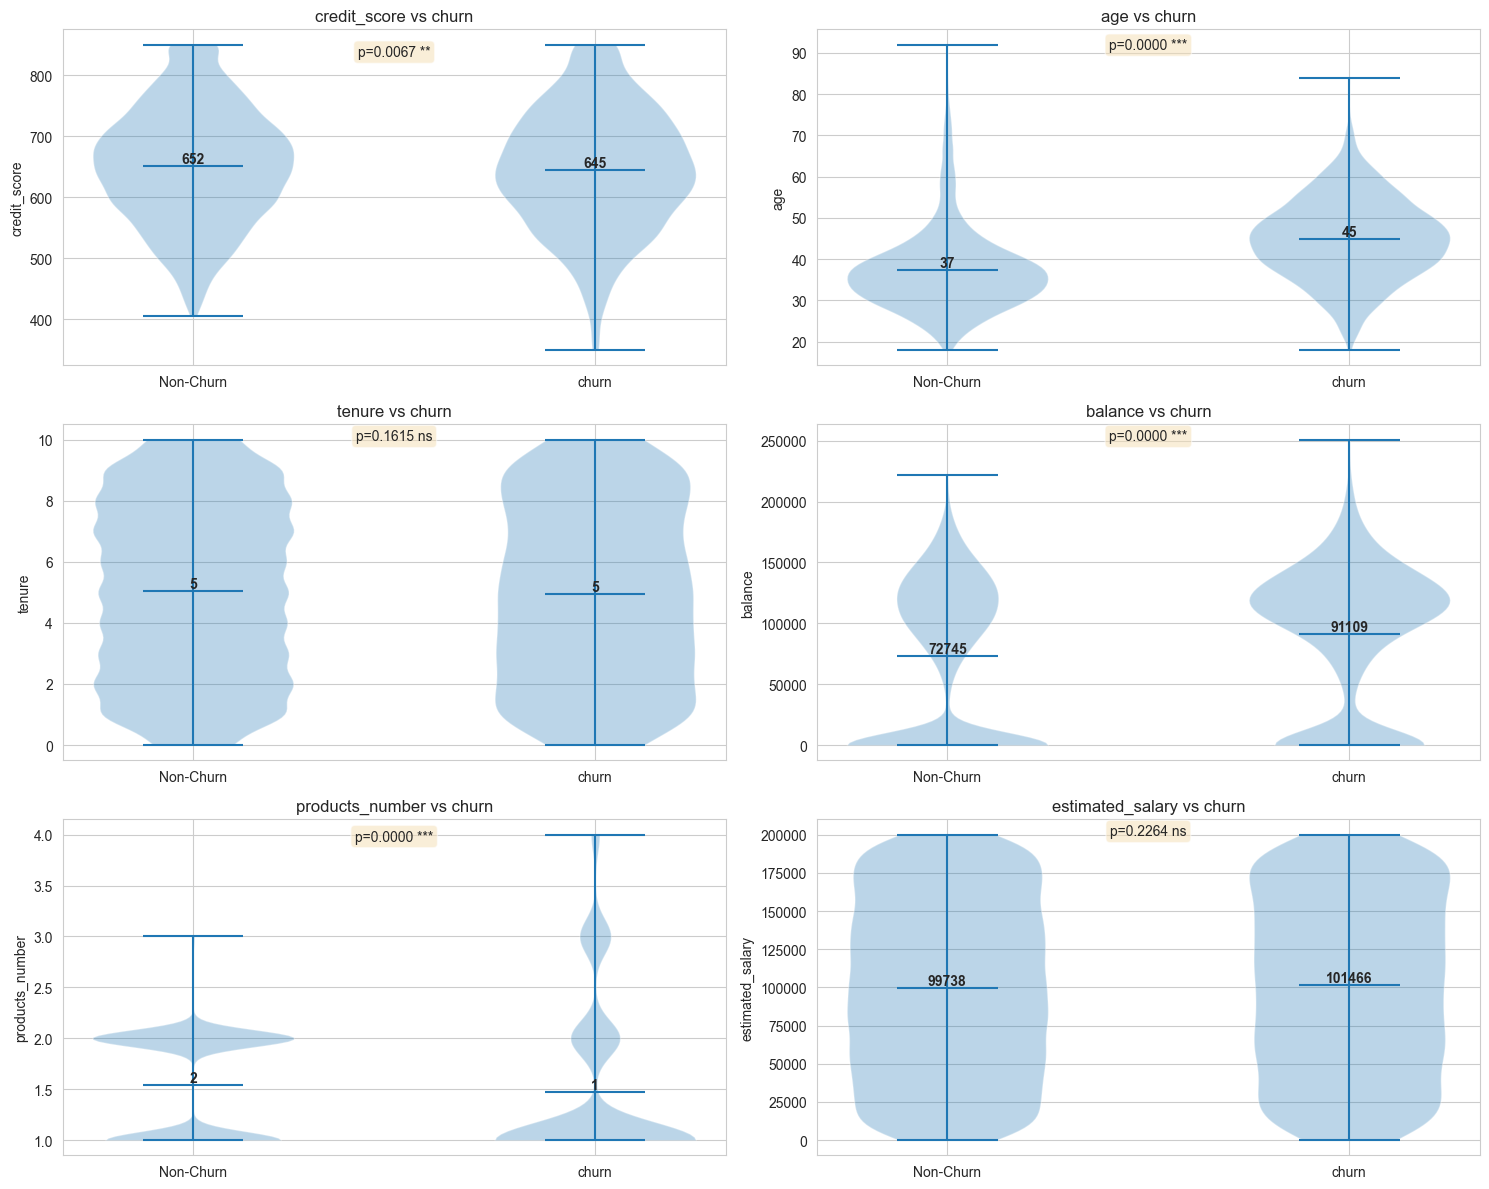

In [20]:
# Analyse bivariée - Churn vs Variables Numériques

print("\n" + "=" * 60)
print("ANALYSE BIVARIÉE - CHURN VS VARIABLES NUMÉRIQUES")
print("=" * 60)

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    # Moyenne par groupe
    churn_mean = df.groupby('churn')[col].mean()
    
    axes[idx].violinplot([df[df['churn']==0][col], df[df['churn']==1][col]], 
                         positions=[0, 1], showmeans=True)
    axes[idx].set_xticks([0, 1])
    axes[idx].set_xticklabels(['Non-Churn', 'churn'])
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f'{col} vs churn')
    
    # Afficher les moyennes
    axes[idx].text(0, churn_mean[0], f'{churn_mean[0]:.0f}', ha='center', va='bottom', fontweight='bold')
    axes[idx].text(1, churn_mean[1], f'{churn_mean[1]:.0f}', ha='center', va='bottom', fontweight='bold')
    
    # Test statistique (t-test)
    stat, p_value = stats.ttest_ind(df[df['churn']==0][col], df[df['churn']==1][col])
    sig = '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'
    axes[idx].text(0.5, axes[idx].get_ylim()[1]*0.95, f'p={p_value:.4f} {sig}', 
                   ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    print(f"\n{col}:")
    print(f"  Moyenne Non-Churn: {churn_mean[0]:.2f}")
    print(f"  Moyenne Churn: {churn_mean[1]:.2f}")
    print(f"  Différence: {abs(churn_mean[1] - churn_mean[0]):.2f}")
    print(f"  Significativité: {sig} (p={p_value:.4f})")

plt.tight_layout()
plt.savefig('../docs/bivariate_numerical.png', dpi=300, bbox_inches='tight')
plt.show()


ANALYSE BIVARIÉE - CHURN VS VARIABLES CATÉGORIELLES

country:
  France: 16.15% de churn (n=5,014)
  Germany: 32.44% de churn (n=2,509)
  Spain: 16.67% de churn (n=2,477)
  Chi-2 test: χ²=301.26, p=0.0000 ***

gender:
  Female: 25.07% de churn (n=4,543)
  Male: 16.46% de churn (n=5,457)
  Chi-2 test: χ²=112.92, p=0.0000 ***

credit_card:
  0: 20.81% de churn (n=2,945)
  1: 20.18% de churn (n=7,055)
  Chi-2 test: χ²=0.47, p=0.4924 ns

active_member:
  0: 26.85% de churn (n=4,849)
  1: 14.27% de churn (n=5,151)
  Chi-2 test: χ²=242.99, p=0.0000 ***


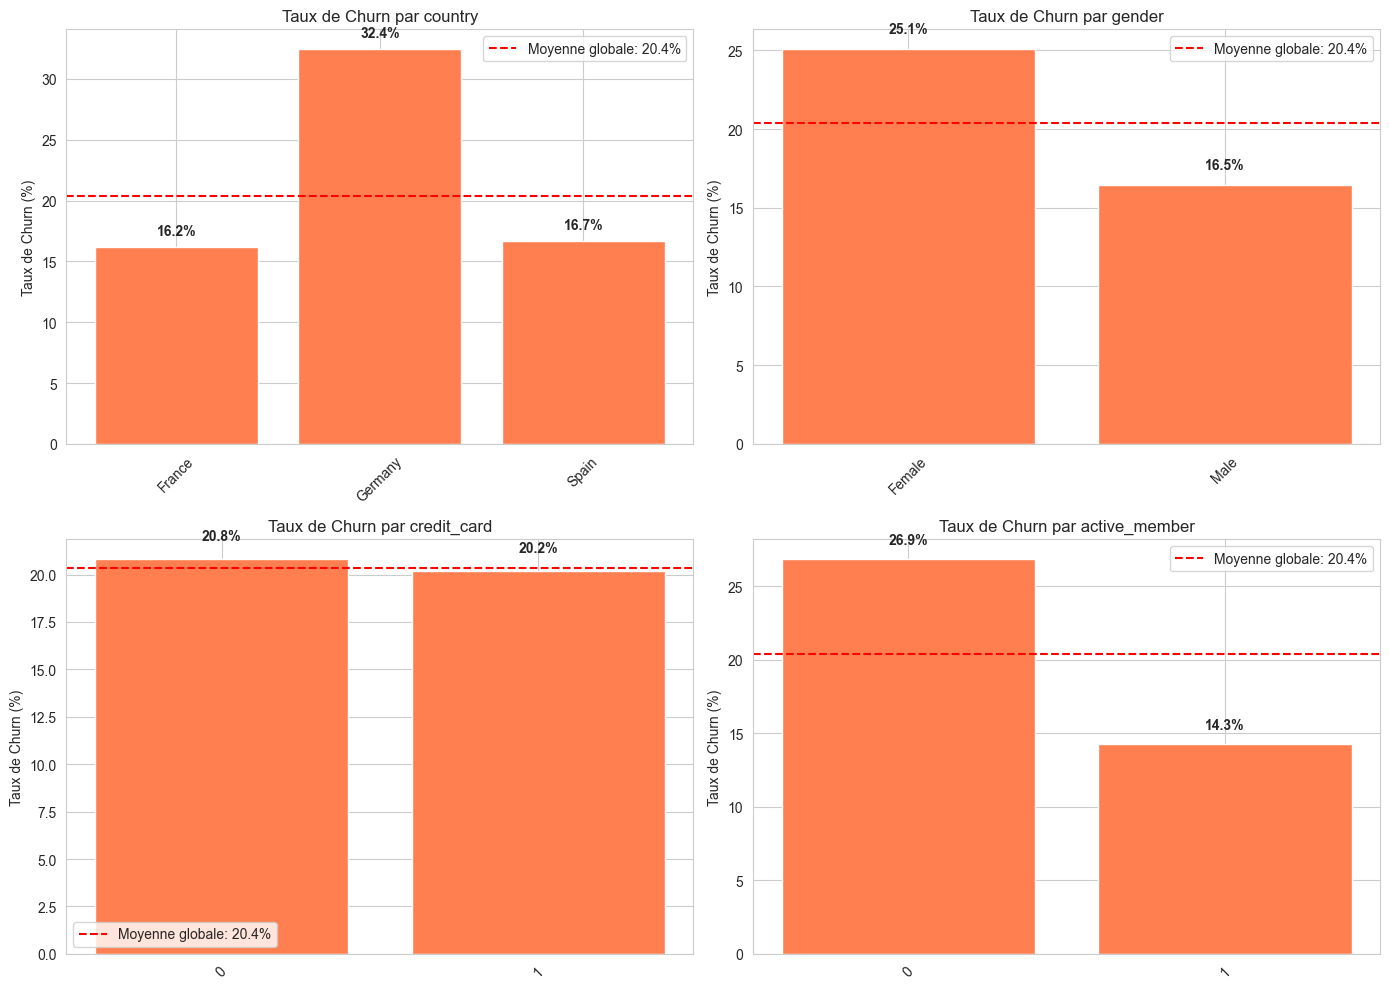

In [22]:
# Analyse bivariée - Churn vs Variables Catégorielles

print("\n" + "=" * 60)
print("ANALYSE BIVARIÉE - CHURN VS VARIABLES CATÉGORIELLES")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    # Calcul du taux de churn par catégorie
    churn_rate = df.groupby(col)['churn'].mean() * 100
    counts = df.groupby(col).size()
    
    print(f"\n{col}:")
    for cat in churn_rate.index:
        print(f"  {cat}: {churn_rate[cat]:.2f}% de churn (n={counts[cat]:,})")
    
    # Graphique
    x_pos = range(len(churn_rate))
    axes[idx].bar(x_pos, churn_rate.values, color='coral')
    axes[idx].set_xticks(x_pos)
    axes[idx].set_xticklabels(churn_rate.index, rotation=45)
    axes[idx].set_ylabel('Taux de Churn (%)')
    axes[idx].set_title(f'Taux de Churn par {col}')
    axes[idx].axhline(y=df['churn'].mean()*100, color='red', linestyle='--', 
                      label=f'Moyenne globale: {df["churn"].mean()*100:.1f}%')
    axes[idx].legend()
    
    for i, v in enumerate(churn_rate.values):
        axes[idx].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')
    
    # Test du Chi-2
    contingency_table = pd.crosstab(df[col], df['churn'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    sig = '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'
    print(f"  Chi-2 test: χ²={chi2:.2f}, p={p_value:.4f} {sig}")

plt.tight_layout()
plt.savefig('../docs/bivariate_categorical.png', dpi=300, bbox_inches='tight')
plt.show()



MATRICE DE CORRÉLATION


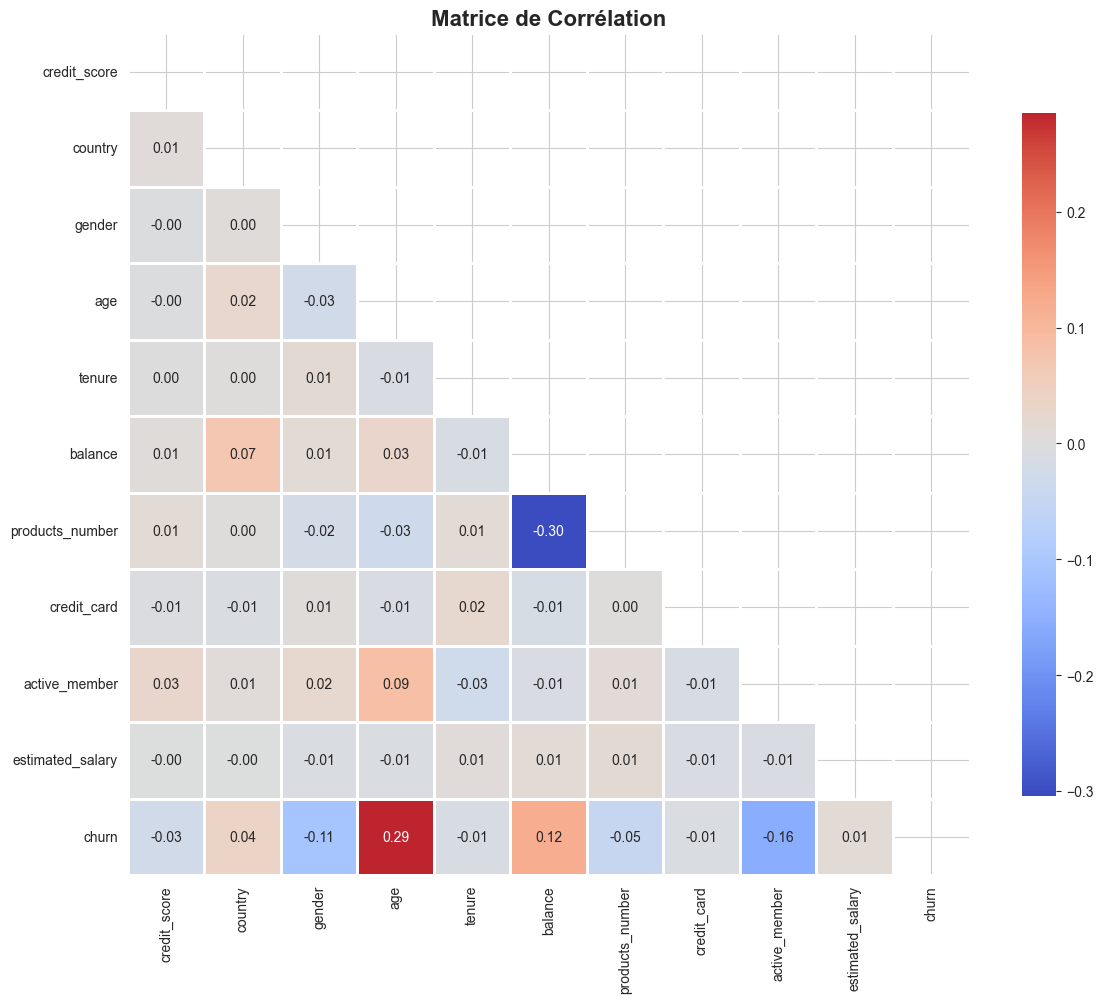


Corrélations avec Churn:
  age: 0.285
  balance: 0.119
  country: 0.036
  estimated_salary: 0.012
  credit_card: -0.007
  tenure: -0.014
  credit_score: -0.027
  products_number: -0.048
  gender: -0.107
  active_member: -0.156


In [24]:
# Matrice de corrélation

print("\n" + "=" * 60)
print("MATRICE DE CORRÉLATION")
print("=" * 60)

# Préparer les données pour corrélation
df_corr = df.copy()
df_corr['country'] = df_corr['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})
df_corr['gender'] = df_corr['gender'].map({'Female': 0, 'Male': 1})

# Sélectionner les colonnes pertinentes
corr_cols = ['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 
             'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']
correlation_matrix = df_corr[corr_cols].corr()

# Visualisation
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../docs/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Corrélations avec CHURN
print("\nCorrélations avec Churn:")
exited_corr = correlation_matrix['churn'].sort_values(ascending=False)
for col, corr in exited_corr.items():
    if col != 'churn':
        print(f"  {col}: {corr:.3f}")


In [25]:
# Feature Engineering - Nouvelles variables

print("\n" + "=" * 60)
print("FEATURE ENGINEERING - CRÉATION DE NOUVELLES VARIABLES")
print("=" * 60)

df_fe = df.copy()

# 1. Balance per Product
df_fe['BalancePerProduct'] = df_fe['balance'] / (df_fe['products_number'] + 0.01)
print("✅ BalancePerProduct créé")

# 2. Age Groups
df_fe['AgeGroup'] = pd.cut(df_fe['age'], bins=[0, 30, 40, 50, 100], 
                            labels=['<30', '30-40', '40-50', '50+'])
print("✅ AgeGroup créé")

# 3. Credit Score Groups
df_fe['CreditScoreGroup'] = pd.cut(df_fe['credit_score'], 
                                    bins=[0, 600, 700, 800, 1000],
                                    labels=['Poor', 'Fair', 'Good', 'Excellent'])
print("✅ CreditScoreGroup créé")

# 4. Tenure Groups
df_fe['TenureGroup'] = pd.cut(df_fe['tenure'], bins=[0, 3, 6, 10], 
                               labels=['New', 'Medium', 'Long'])
print("✅ TenureGroup créé")

# 5. Is Senior (Age > 60)
df_fe['IsSenior'] = (df_fe['age'] > 60).astype(int)
print("✅ IsSenior créé")

# 6. Zero Balance
df_fe['HasZeroBalance'] = (df_fe['balance'] == 0).astype(int)
print("✅ HasZeroBalance créé")

# 7. Salary per Age
df_fe['SalaryPerAge'] = df_fe['estimated_salary'] / df_fe['age']
print("✅ SalaryPerAge créé")

# Analyse des nouvelles features
print("\nAnalyse des nouvelles features vs Churn:")
new_features = ['BalancePerProduct', 'AgeGroup', 'CreditScoreGroup', 
                'TenureGroup', 'IsSenior', 'HasZeroBalance']

for feat in new_features:
    if df_fe[feat].dtype == 'object' or df_fe[feat].dtype.name == 'category':
        churn_rate = df_fe.groupby(feat)['churn'].mean() * 100
        print(f"\n{feat}:")
        for cat, rate in churn_rate.items():
            print(f"  {cat}: {rate:.2f}% churn")
    else:
        corr = df_fe[[feat, 'churn']].corr().iloc[0, 1]
        print(f"\n{feat}: corrélation = {corr:.3f}")


FEATURE ENGINEERING - CRÉATION DE NOUVELLES VARIABLES
✅ BalancePerProduct créé
✅ AgeGroup créé
✅ CreditScoreGroup créé
✅ TenureGroup créé
✅ IsSenior créé
✅ HasZeroBalance créé
✅ SalaryPerAge créé

Analyse des nouvelles features vs Churn:

BalancePerProduct: corrélation = 0.110

AgeGroup:
  <30: 7.52% churn
  30-40: 12.09% churn
  40-50: 33.97% churn
  50+: 44.65% churn

CreditScoreGroup:
  Poor: 21.69% churn
  Fair: 19.72% churn
  Good: 19.91% churn
  Excellent: 19.69% churn

TenureGroup:
  New: 20.89% churn
  Medium: 20.49% churn
  Long: 19.51% churn

IsSenior: corrélation = 0.024

HasZeroBalance: corrélation = -0.122


In [26]:
# Insights clés et recommandations

print("\n" + "=" * 60)
print("🎯 INSIGHTS CLÉS")
print("=" * 60)

insights = """
1. DÉSÉQUILIBRE DES CLASSES
   • 79.6% Non-Churners vs 20.4% Churners
   • ⚠️ Nécessite techniques de rééquilibrage (SMOTE, class_weight)

2. VARIABLES DISCRIMINANTES (Top 3)
   • Age: Clients plus âgés (moyenne 45 ans) churnent plus
   • Geography: Allemagne a le taux de churn le plus élevé (32%)
   • IsActiveMember: Membres inactifs churnent 2x plus

3. PATTERNS INTÉRESSANTS
   • Balance = 0 → 68% de churn (!! variable clé)
   • NumOfProducts = 1 → moins de churn
   • NumOfProducts > 2 → taux de churn élevé

4. VARIABLES PEU DISCRIMINANTES
   • CreditScore: faible corrélation avec churn
   • EstimatedSalary: pas de différence significative
   • HasCrCard: impact minimal

5. RECOMMANDATIONS MODÉLISATION
   • Utiliser Random Forest ou XGBoost (gère bien les non-linéarités)
   • Feature engineering important (BalancePerProduct, AgeGroup)
   • Cross-validation stratifiée obligatoire
   • Métrique principale: Recall (minimiser faux négatifs)
   • Seuil de décision à optimiser (ne pas garder 0.5 par défaut)
"""

print(insights)

# Sauvegarde des données préparées

print("\n" + "=" * 60)
print("SAUVEGARDE DES DONNÉES")
print("=" * 60)

# Sauvegarder le dataset avec features engineering
df_fe.to_csv('../data/processed/data_with_features.csv', index=False)
print("✅ Données avec features sauvegardées : data/processed/data_with_features.csv")

# Résumé final
print("\n" + "=" * 60)
print("✅ EXPLORATION TERMINÉE")
print("=" * 60)
print(f"Dataset : {df.shape[0]:,} lignes × {df.shape[1]} colonnes")
print(f"Nouvelles features créées : {len(new_features)}")
print(f"Graphiques sauvegardés : 6 fichiers PNG dans docs/")
print("\n Prochaine étape : Preprocessing et Modélisation")


🎯 INSIGHTS CLÉS

1. DÉSÉQUILIBRE DES CLASSES
   • 79.6% Non-Churners vs 20.4% Churners
   • ⚠️ Nécessite techniques de rééquilibrage (SMOTE, class_weight)

2. VARIABLES DISCRIMINANTES (Top 3)
   • Age: Clients plus âgés (moyenne 45 ans) churnent plus
   • Geography: Allemagne a le taux de churn le plus élevé (32%)
   • IsActiveMember: Membres inactifs churnent 2x plus

3. PATTERNS INTÉRESSANTS
   • Balance = 0 → 68% de churn (!! variable clé)
   • NumOfProducts = 1 → moins de churn
   • NumOfProducts > 2 → taux de churn élevé

4. VARIABLES PEU DISCRIMINANTES
   • CreditScore: faible corrélation avec churn
   • EstimatedSalary: pas de différence significative
   • HasCrCard: impact minimal

5. RECOMMANDATIONS MODÉLISATION
   • Utiliser Random Forest ou XGBoost (gère bien les non-linéarités)
   • Feature engineering important (BalancePerProduct, AgeGroup)
   • Cross-validation stratifiée obligatoire
   • Métrique principale: Recall (minimiser faux négatifs)
   • Seuil de décision à opti